## Objective 

1. Lets take haberman's cancer survival dataset which depicts status of the patients after 5 years of operation, considering the features like year on which they are operated, age and number of positive lymph nodes.
2. We conduct Univariate, Bi-Variate and Multivariate analysis for gaining better understanding of the data
3. This notebook's purpose is to demonstrate various EDA techniques but not to create a baseline model straight from the EDA techniques (FYI: dataset is imbalanced anyway).




In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [46]:
hm = pd.read_csv("haberman.csv",names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
print(hm.head())


   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [47]:
hm['survival_status_after_5_years'] = hm['survival_status_after_5_years'].map({1:"yes", 2:"no"})
hm['survival_status_after_5_years'] = hm['survival_status_after_5_years'].astype('category')
hm.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [48]:
hm.shape

(306, 4)

In [49]:
hm['survival_status_after_5_years'].value_counts()

yes    225
no      81
Name: survival_status_after_5_years, dtype: int64

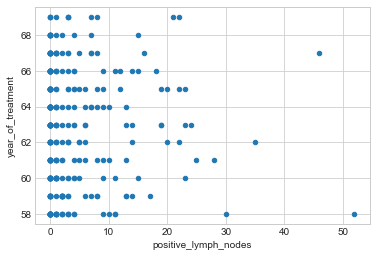

In [50]:
hm.plot(kind='scatter', x='positive_lymph_nodes', y='year_of_treatment') ;
plt.show()

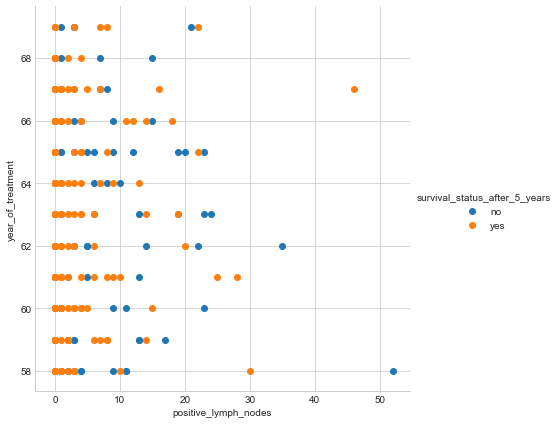

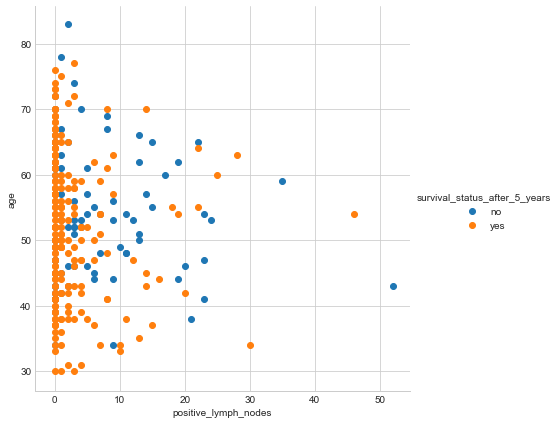

In [51]:
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="survival_status_after_5_years", size=6) \
   .map(plt.scatter, "positive_lymph_nodes", "year_of_treatment") \
   .add_legend();
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="survival_status_after_5_years", size=6) \
   .map(plt.scatter, "positive_lymph_nodes", "age") \
   .add_legend();
plt.show();


## Observation:

1. Two features positive_lymph_nodes and year_of_treatment are distributed similarly negating the possibility to make any inference.
2. Considering positive_lymph_nodes and age features, we can say that most of the data points of positive_lymph_nodes are 0 and people who survived with 0 positive nodes are more than non-survivors.
3. Age did not make much contribution to any insight.

## Pairplot for Bi-Variate Analysis

   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           yes
1   30                 62                     3                           yes
2   30                 65                     0                           yes
3   31                 59                     2                           yes
4   31                 65                     4                           yes


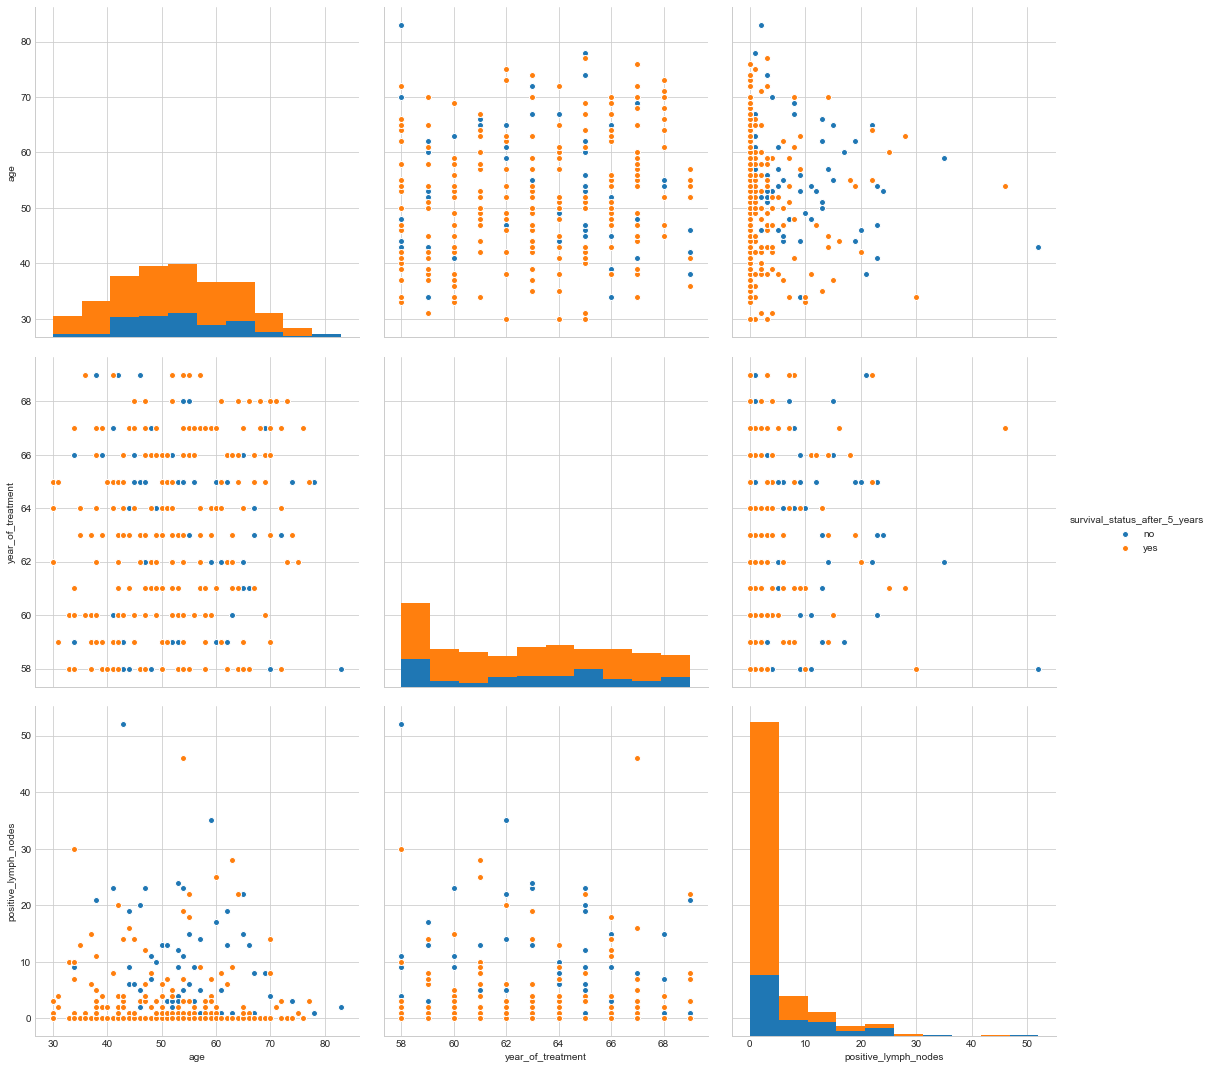

In [69]:
plt.close();
print(hm.head())
sns.set_style("whitegrid");
sns.pairplot(hm, hue="survival_status_after_5_years", size=5);
plt.show()

## Observations:

1. Almost all pairplots are not linearly separable between survival_status_after_5_years yes and no.
2. positive_lymph_nodes and year_of_treatment features seem to have slightly better separation than other features combined. 

## Histogram, PDF & CDF for Univariate Analysis

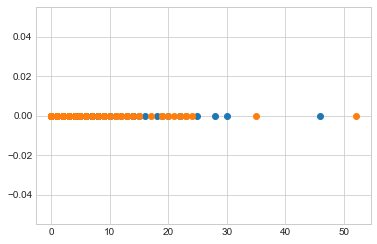

In [70]:
import numpy as np
one = hm.loc[hm["survival_status_after_5_years"] == 'yes'];
two = hm.loc[hm["survival_status_after_5_years"] == 'no'];


plt.plot(one["positive_lymph_nodes"], np.zeros_like(one['positive_lymph_nodes']), 'o')
plt.plot(two["positive_lymph_nodes"], np.zeros_like(two['positive_lymph_nodes']), 'o')

plt.show()

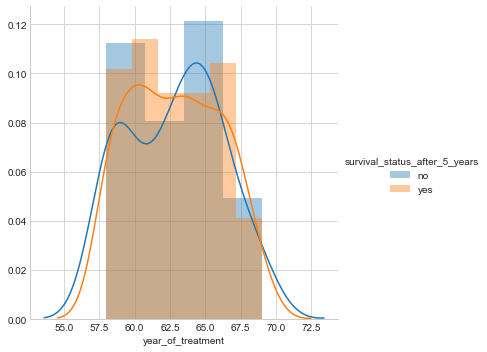

In [71]:
sns.FacetGrid(hm, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "year_of_treatment") \
   .add_legend();
plt.show();

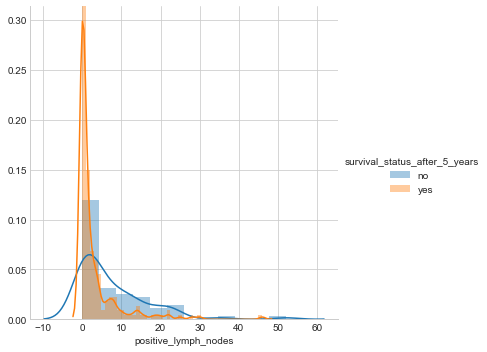

In [72]:
sns.FacetGrid(hm, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "positive_lymph_nodes") \
   .add_legend();
plt.show();

## Observation:

1. Obviously a better plot than taking year_of_treatment feature.
2. Number of people with Positive lymph nodes is high from 0 - 5 for survivors.
3. More chances a person falls into non-survival group if the positive lymph nodes is more than 5.


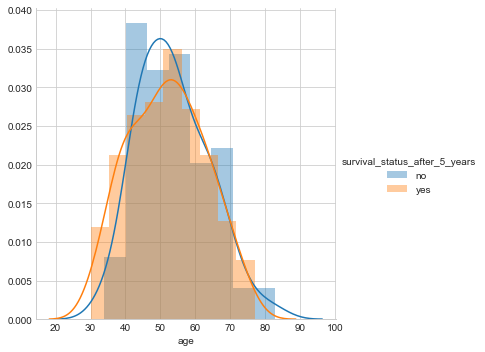

In [73]:
sns.FacetGrid(hm, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

## Observation
1. More chances of non survival of the age is between 40-55
2. If age is greater than 60, it is almost impossible to predict yes or no.
3. If age is lesser than 40, it is reasonable to say person has higher chances of surviving.


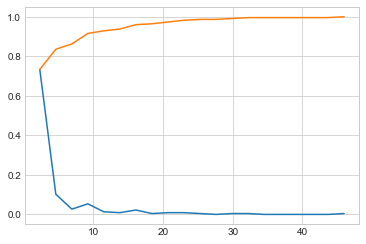

In [74]:
counts, bin_edges = np.histogram(one['positive_lymph_nodes'], bins=20, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)



plt.show();


## Observations
1. 80% of the survivor patients have 0-5 positive nodes

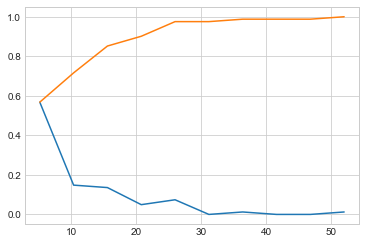

In [75]:
counts, bin_edges = np.histogram(two['positive_lymph_nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.show();


## Observation

1. 80% of non-survivor patients have positive nodes in the range of 0-15, so we might infer 5-10 nodes can signify higher risk of non survival.


# Combining both the plots

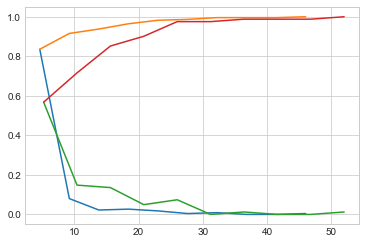

In [76]:
# Plots of CDF of petal_length for various types of flowers.


# survived after 5 years
counts, bin_edges = np.histogram(one['positive_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# not survived after 5 years
counts, bin_edges = np.histogram(two['positive_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

In [77]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Survivors after 5 years",np.mean(one["positive_lymph_nodes"]))
#Mean with an outlier.
#print(np.mean(np.append(iris_setosa["petal_length"],50)));
print("Non Survivors after 5 years",np.mean(two["positive_lymph_nodes"]))
print("Survivors after 5 years",np.mean(one["age"]))
print("Non Survivors after 5 years",np.mean(two["age"]))

print("\nStd-dev:Pos_nodes");
print("Survivors after 5 years",np.std(one["positive_lymph_nodes"]))
print("Non Survivors after 5 years",np.std(two["positive_lymph_nodes"]))

print("\nStd-dev:Age")
print("Survivors after 5 years",np.std(one["age"]))
print("Non Survivors after 5 years",np.std(two["age"]))







Means:
Survivors after 5 years 2.7911111111111113
Non Survivors after 5 years 7.45679012345679
Survivors after 5 years 52.01777777777778
Non Survivors after 5 years 53.67901234567901

Std-dev:Pos_nodes
Survivors after 5 years 5.857258449412131
Non Survivors after 5 years 9.128776076761632

Std-dev:Age
Survivors after 5 years 10.98765547510051
Non Survivors after 5 years 10.10418219303131


## Observation

1. Mean of pos_nodes differentiates between survivor and non-survivor candidates where mean of age nor year does not signify apparently.
2. Std_dev of pos_nodes for survivors is very less compared to non-survivors where as Std_dev on Age does not signify any useful information.


## Lets take a look at how median is distributed for survivors and non-survivors

In [78]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(one["positive_lymph_nodes"]))
print(np.median(two["positive_lymph_nodes"]))

print("\nQuantiles:")
print(np.percentile(one["positive_lymph_nodes"],np.arange(0, 100, 25)))
print(np.percentile(two["positive_lymph_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(one["positive_lymph_nodes"],90))
print(np.percentile(two["positive_lymph_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(one["positive_lymph_nodes"]))
print(robust.mad(two["positive_lymph_nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


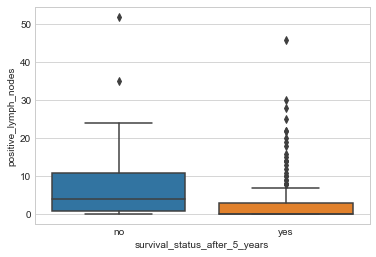

In [79]:
sns.boxplot(x='survival_status_after_5_years',y='positive_lymph_nodes', data=hm)
plt.show()

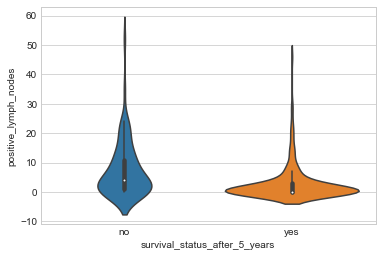

In [80]:
sns.violinplot(x="survival_status_after_5_years", y="positive_lymph_nodes", data=hm, size=8)
plt.show()

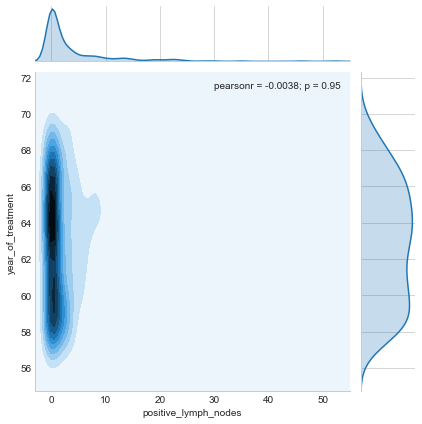

In [81]:
sns.jointplot(x="positive_lymph_nodes", y="year_of_treatment", data=hm, kind="kde");
plt.show();


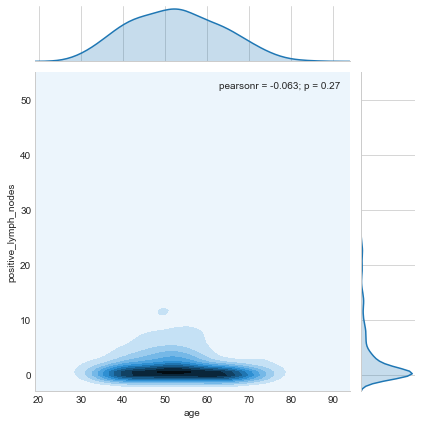

In [82]:
sns.jointplot(x="age", y="positive_lymph_nodes", data=hm, kind="kde");
plt.show();

## Conclusion

1. If dataset is balanced, we could have built average accuracy baseline model
2. Almost lot of people have no postitive lymph nodes
3. Less risk if pos_nodes are less than 5 and vice versa.
4. If age is less than 40, less risk.
